# EDA Pavlo

## Load data

In [11]:
import pandas as pd
import seaborn as sns

url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
df = pd.read_csv(url)
# test dataset remove before hackaton
df = sns.load_dataset('iris')
print(f'Dataset shape {df.shape}')
df.tail()


Dataset shape (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Explore data

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
# to categorical
df['species'] = df['species'].astype("category")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [60]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [62]:
# check out duplicates 
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [61]:
# check the balance
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Visualization

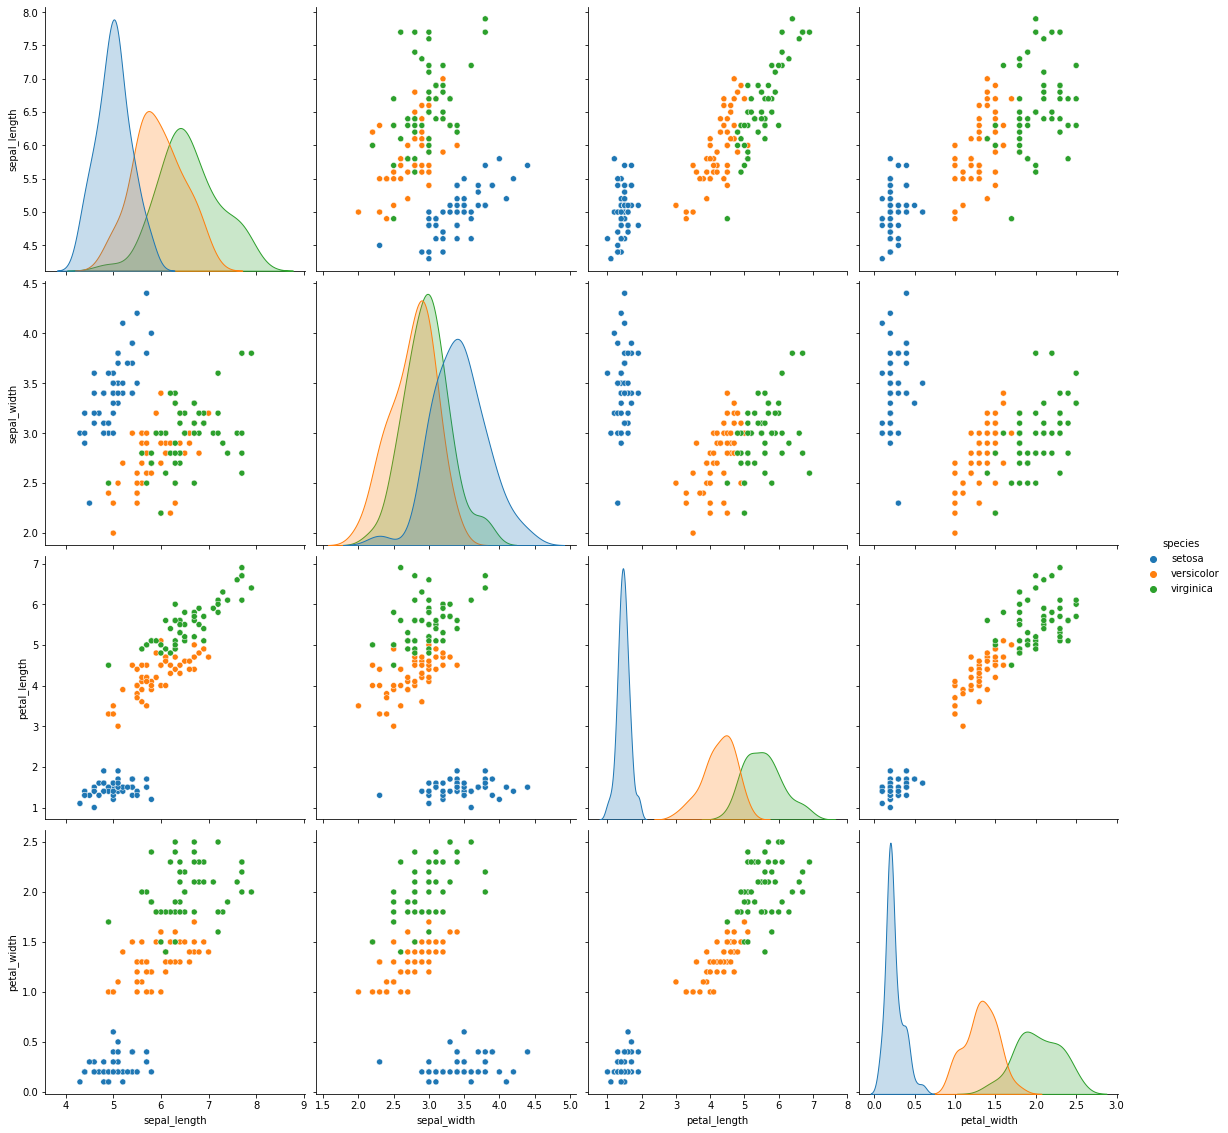

In [63]:
sns.pairplot(
    data=df,
    hue='species',
    height=4)

<AxesSubplot:xlabel='species', ylabel='count'>

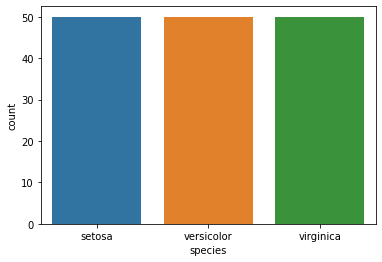

In [64]:
sns.countplot(x=df['species'])

<AxesSubplot:title={'center':'Comparison between various species based on sapel length and width'}, xlabel='sepal_length', ylabel='sepal_width'>

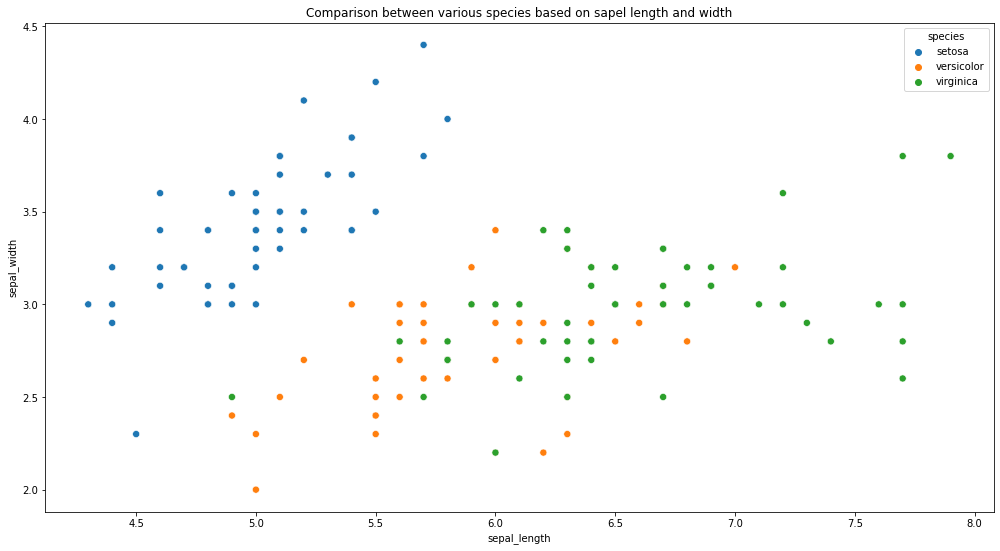

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on sapel length and width')
sns.scatterplot(
    x=df['sepal_length'],
    y=df['sepal_width'],
    hue =df['species'],
    s=50)

<AxesSubplot:title={'center':'Comparison between various species based on petal lenght and width'}, xlabel='petal_length', ylabel='petal_width'>

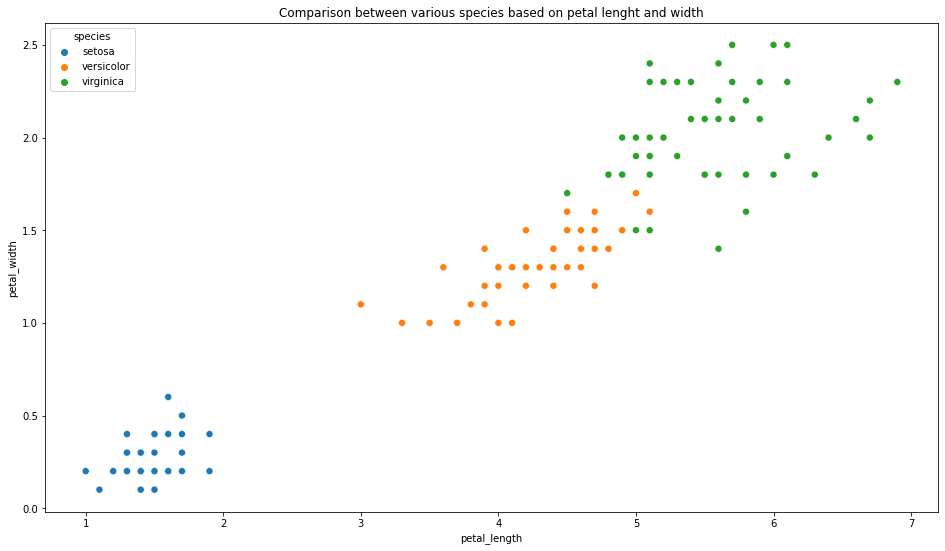

In [66]:
plt.figure(figsize=(16,9))
plt.title('Comparison between various species based on petal lenght and width')
sns.scatterplot(
    x=df['petal_length'], 
    y=df['petal_width'], 
    hue = df['species'], 
    s= 50)

<AxesSubplot:>

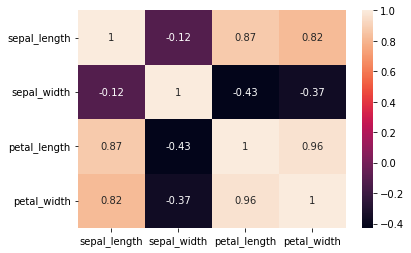

In [67]:
sns.heatmap(
    df.corr(),
    annot=True)

In [68]:
# Checking Mean & Median Values for each species

df.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.428    3.4        1.462   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.246    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

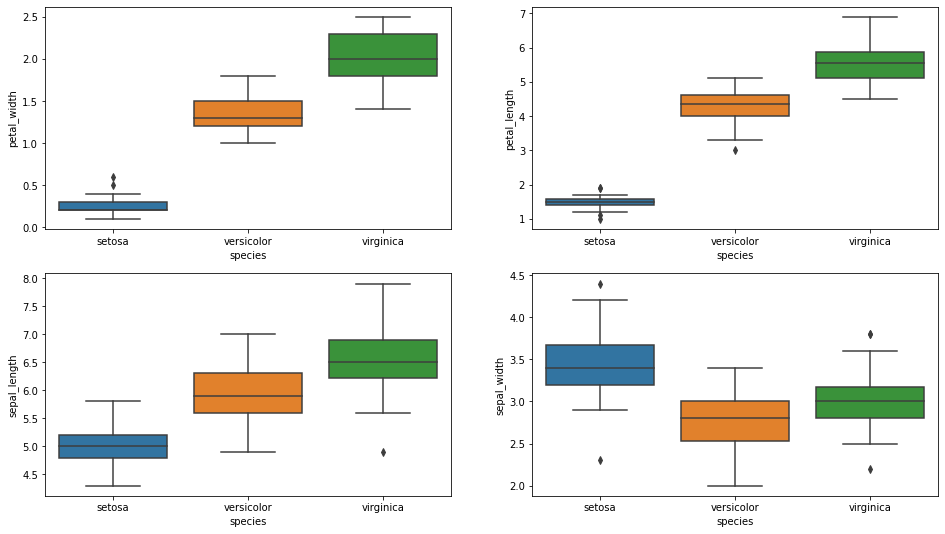

In [69]:
# box plots

fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal_width', x= 'species', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petal_length', x= 'species', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepal_length', x= 'species', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepal_width', x= 'species', data=df, orient='v' , ax=axes[1, 1])
plt.show()

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

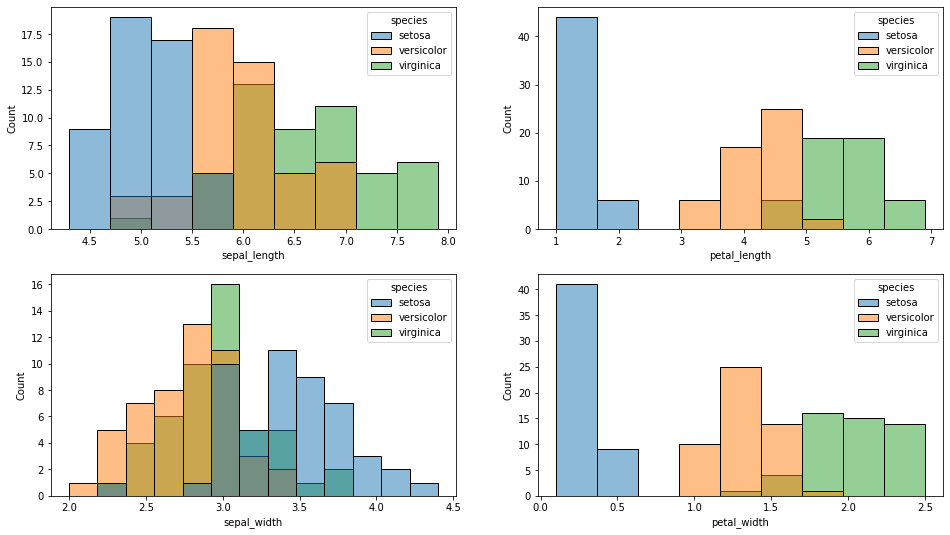

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

sns.histplot(
    data=df,
    x='sepal_length',
    hue='species',
    ax=axes[0,0],
)

sns.histplot(
    data=df,
    x='petal_length',
    hue='species',
    ax=axes[0,1],
)

sns.histplot(
    data=df,
    x='sepal_width',
    hue='species',
    ax=axes[1,0],
)

sns.histplot(
    data=df,
    x='petal_width',
    hue='species',
    ax=axes[1,1],
)

## Data cleaning and encoding

In [16]:
# encoding categorical
dff = pd.get_dummies(df,columns=['species'],drop_first=False)


In [19]:
dff.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# Model

### Prepare data

In [18]:
from sklearn.model_selection import train_test_split

y = df.pop()
X_train, X_test, y_train, t_test = train_test_split(df, y, test_size=0.2)

TypeError: pop() missing 1 required positional argument: 'item'

### Train

#### Simple models

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

#### Ensembles

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

## Hyperparameter tuning